# Introduction

**This is my first participation in the kaggle-survey 2021 competition.**

**This year, as in 2017, 2018, 2019, and 2020 Kaggle set out to conduct an industry-wide survey that presents a truly comprehensive view of the state of data science and machine learning. The survey was live from 09/01/2021 to 10/04/2021, and after cleaning the data they finished with 25,973 responses!**

**There's a lot to explore here. The results include raw numbers about who is working with data, what’s happening with machine learning in different industries, and the best ways for new data scientists to break into the field. Kaggle have published the data in as raw a format as possible without compromising anonymization, which makes it an unusual example of a survey dataset. The survey response dataset can be found here along with other details can be found [here.](https://www.kaggle.com/c/kaggle-survey-2021/data)**

# Idea

**My basic idea is to find the basic distributions and what is trending among the students in data science vs what are the trending practices of professionals in their day to day routine.There are a whole lot of aspiring data scientists who have participated in this survey as a student. Being a student myself, sometimes I wish if there was some way one could know what methodologies,hardwares,language,coding skills etc. are needed in real day to day life of a data scientist, a student could be more clear of the sequence he/she must start learning. Also, this comaparisons will give an idea to teachers and eductors of data science, the demand various technologies and thus help the students properly with no ambiguity.**

# Methodology

**With the help of EDA using graphs let's find an overall similar and dissimilar practices among professionals and students. Finally we can find new ways how students can be guided on the correct path to become a good professional in any subset of data science. I have used pandas for data manipulation and extraction , numpy for numerical operations(if needed) , plotly for easy visualization(interactive graphs). This simple notebook aims at providing a clear guidance to students on what is currently trending among students and among real and professional data scientists with clear visualizations.**

In [ ]:
#importing required libraries
import warnings
warnings.filterwarnings("ignore")         #this will ignore any unnecessary warnings
import pandas as pd                       #our very own pandas for all dataframe works
import numpy as np                        #numerical python for numeric operations
pd.set_option('display.max_rows', None)   #this will allow to see all the rows
pd.set_option('display.max_columns', None)#this will allow to see all the columns
import plotly.express as px               #plotly for interactive graphs
import plotly.graph_objs as go            #some more plotly graph components (not sure if i used this)
import matplotlib.pyplot as plt           #basic friendly plots 
import seaborn as sns                     #some more plotting library (just included everything)
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)  #due to some error https://www.kaggle.com/product-feedback/138599

# 1. Basic view on the whole set

>
![](https://pbs.twimg.com/media/C2FFY-mXgAEZr29.jpg)


Let's first extract the data by our very usual pandas.read_csv method

In [ ]:
df = pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')
df.head()

In [ ]:
print("Shape of our dataset : ",df.shape)

> *Okay .. Great ! So here we have our data. Our data has 25973 (first row has all the questions asked) entries and 369 columns. All the columns represent questions and it's parts.*
*The questions that were asked can be found on the description [here.](https://www.kaggle.com/c/kaggle-survey-2021/data)*

In [ ]:
#just a function for making bar graphs using plotly
#function receives the dataframe and title as input
def dist1col(df,title):
  fig = px.bar(df , x=df.index , y=df['Count'], color=df['Count'],title=title)
  fig.show()
#here i have used this function to create a value_counts() series and convert it to data frame.
#value_counts() is a pandas function that returns object containing counts of unique values.
#The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.
#more information can be found (https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)
def dfmaker(col):
  ser = df[col].drop(index=0).value_counts() 
  temp = pd.DataFrame(ser)
  temp.columns=['Count']
  return temp

> ### 1.2 The profession distribution.

In [ ]:
dist1col(dfmaker('Q5'),'Profession Distribution')

> *Hmmmm.. So, Students form a large part of this survey. Alright , i have got my idea !! Being a student, this highly interests me to know about the students who have participated. What are their choices of various ML practices? What are their hardware preferences? What profession are they following? Are they earning??
Indeed, So many questions!! So, come along let's find more about the students!!!*

> ![](https://www.siliconrepublic.com/wp-content/uploads/2014/12/img/data-scientist-meme-3.jpg)

# 2 . Students vs Professionals (Basic EDA and Comparisons).
<img src="https://miro.medium.com/max/1400/1*SYcrKx8604PyhZbK_abc7g.png" width="500">

In [ ]:
stud = df[df['Q5'] == 'Student'] #extracting the students from whole dataset
others = df[(df['Q5']!='Student') & (df['Q5']!='Others') & (df['Q5'] != 'Currently not employed')].drop(index=0) #extracting information about other professionals to keep track of what is needed to be improved in students to be profession ready
print("Students group : ",stud.shape[0])
print("Professional group : ",others.shape[0])

> *Total number of students participated are 6804 and professionals are 17813.*

In [ ]:
#function for bar graph
def graph(df,title):
  fig = px.bar(df , x=df.index , y=df['Count'], color=df['Count'],title=title)
  fig.show()
    
#function for pie chart
def graph_pie(df,title):
  fig = px.pie(df, values='Count', names=df.index, title=title)
  fig.show()

#some of the questions have various parts so to combine them and compare them on graph this function has been created
def group_for_part(df,x1,x2,column):
    cols=df.columns.to_list()
    l=[]
    for col in cols:
        if (x2 in col):
            l.append(col)
    temp = others.groupby(x1)[l].count().drop(x2+'_OTHER',axis=1)
    temp.columns = column
    fig = px.bar(temp, x=temp.index,y=temp.columns.to_list())
    fig.show()
    
#created a function here which will help to compare different categories
def group_maker(df,col1,col2,col3):
  grp = df.groupby([col1,col2])[[col3]].count()
  grp.columns=['Count']
  grp = grp.reset_index().sort_values(ascending=False,by='Count')
  return grp

#bar graph function to compare different groups
def grp_graph_maker(df,title):
  col = df.columns.to_list()
  fig = px.bar(df , x=df[col[0]] , y=df['Count'], color=df[col[1]],title=title)
  fig.show()

#here i have used this function to create a value_counts() series and convert it to data frame.
#value_counts() is a pandas function that returns object containing counts of unique values.
#The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.
#more information can be found (https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)
def df_maker(df,col):
  ser = df[col].value_counts() 
  temp = pd.DataFrame(ser)
  temp.columns=['Count']
  return temp

#some of the questions had some parts. so these parts were divided intp columns having each value
#each column had NaN values where the column answer was nill. so i used this function to combine all those parts
#this in return will give a combined dictionary

def combine(df,name):
    cols = df.columns.to_list()
    combine_dic = {}
    temp_dic = {}
    for col in cols:
        if (name in col):
          temp_dic = df[col].value_counts().to_dict()
        for i in temp_dic.keys():
          combine_dic[i] = temp_dic[i]
    combine_dt = pd.DataFrame.from_dict(combine_dic,orient='index').sort_values(by=0 , ascending=False)
    combine_dt.columns=['Count']
    return combine_dt

> ### 2.1 Age distribution 
<img src="https://i.pinimg.com/originals/c6/22/17/c6221712c8b6c1d113e30e3c3fc15fa3.jpg" width="400">

In [ ]:
graph(df_maker(stud,'Q1'),'Age distribution of Students')

> *As they say there is no age to learning, our participants have proved this. Survey includes people from all age group as students. Most of them are from 18-21 which is obvious. But also many people of age group 22-24 and 25-29 are students. Probably they are undergoing some carrer transition and are changing to data science. Also, 6 people of age 70+ are actively learning. This is awesome.. Data science welcomes all of them heartily!!*

> **🔴Key point - with people from various age groups trying to learn and implement something new in the data science , indicates the keen interest of people in this field. People therefore must be encouraged to participate and showcase their talents more and more.Platforms like Kaggle , CROWDANALYTIX and many more provide a great platform to showcase the talents. You can find some more  [here.](https://www.kdnuggets.com/2020/09/international-alternatives-kaggle-data-science-competitions.html)**


> ### 2.2 Gender distribution
![](https://cdn.boldomatic.com/content/post/pjgMeg/The-mind-has-no-gender?size=350)

In [ ]:
graph_pie(df_maker(stud,'Q2'),'Gender distribution among Students')

> *Most of the students are Male (value = 74.9%). Also women have been actively participating more than previous years (value = 23.1%). I guess schools and colleges must encourage all genders for their participation.*


> **🔴Key point - Slight increase of the percentage of other genders (other than men) in the survey shows the increased interest as well as awarness among other genders. We must encourage students from all genders to participate equally with others . This in turn will lead to an holistic development of the data science student community.**

> ### 2.3 Top 10 countries having highest student participation
> <img src="https://media.istockphoto.com/vectors/world-map-together-hands-pointing-together-concept-of-teamwork-vector-id666546178?s=612x612" width="300">

In [ ]:
graph(df_maker(stud,'Q3').head(10),'Top 10 countries distribution - Students')
graph(df_maker(others,'Q3').head(10),'Top 10 countries distribution - Professionals')

> *Indian students are found to have keen interest in data science. Also among professionals India has topped again. This is a proud moment for Indians🙏*

> **🔴Key point - Also, this may be due to the high population in India. Yet, it is good to know that major number of students and professionals are actively giving to the data science community from India. This is followed by USA , China ,Japan and others
As a whole I guess data science is such a beautiful field that it must encouraged in every country.**

> ### 2.4 Education
> 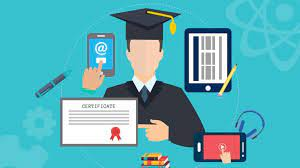

In [ ]:
graph(df_maker(stud,'Q4'),'Education distribution - Students')
graph(df_maker(others,'Q4'),'Education distribution - Professionals')

> *Most of the students have bachelor's degree as highest education. Also Master's degree and some are still studying in colleges. Also, few are here who are Doctorate and professional doctorate. Among professionals most of them are of Master's degree , also good count of people are having Bachelor's degree.*

> *Now let's have a look which online platform do our students prefer. This can help new aspirants to choose a platform of learning to begin with*



In [ ]:
graph(combine(stud,'Q40'),'Preferred platforms for data science courses')

> *Social medias play a great role to keep us updated on new technologies everyday. One can not only get knowledge from learning different courses , but also by being aware of all the new developments around us. Let's look at the top 6 media sources considered best and are popular among Students for data science materials and cheat sheets.*

In [ ]:
graph(combine(stud,'Q42').head(6),'Language preference - Students')

> **🔴Key point - Not just a degree!! What matters most in data science is showcasing the skills gained. Most of the students are busy upskilling themselves from various courses of Coursera,Kaggle courses,Udemy and many more. Aspirants in data science must be interested on data science , showcase their skills and most importantly keep learning. The above graphs can help them in choosing the media sources to follow which are popular among other aspirants. Social medias like Youtube, Reddit, Twitter etc. will also help them to get connected with various other aspirants and professionals. This in turn will increase the exposure.**

> ### 2.4 Coding experience 
<img src = "https://s.keepmeme.com/files/en_posts/20200925/confused-cat-looking-at-computer-with-a-lot-of-question-marks-meme-861f3efff59aedea603e35b8c3c059f0.jpg" width="200" height="150">

In [ ]:
graph(df_maker(stud,'Q6'),'Coding experience - Students')
graph(df_maker(others,'Q6'),'Coding experience - Professionals')

> *Most of the students have an overall experience of 1-3 years of coding.This is a good start for any beginner in data science. However, more the experience , easier is your way to learn data science.*

> **🔴Key point - experience data scientists always suggest to have a good grasp over programming (in any language of your preference). Developing good coding skills is very much important. Most of the students in the survey have 1-3 years of experience and few have 5-10 years and 10-20 years also. Also 23 people among the students have 20+years of  which is amazing. There are many sectors of data science , some need excellent coders and some need basic coders with whole lot of creativity. The professionals have proved that too. Most of the professionals have 1-3 years of experience.**

> **Let's find from the professionals which sectors of data science need how much experience of coding. This will help the students to plan accordingly how much coding to practice(However more the coding more is the fun😃)**

In [ ]:
grp_graph_maker(group_maker(others,'Q5','Q6','Q6'),'Coding experience for different profession')

> **🔴Key point - Here we can well see and compare for different professions , professionals prefer atleast 1-3 years of coding.However software engineers prefer 3-5 years of coding almost equally. Hence students must be encouraged in the same to keep a practice for coding.Okay well, now which language should we choose?**

> ### 2.5 Language preference
<img src="https://storage.googleapis.com/kaggle-forum-message-attachments/703594/14673/DATAAC.jpeg" width="350">

In [ ]:
graph(combine(stud,'Q7'),'Language preference - Students')
graph(combine(others,'Q7'),'Language preference -Professionals')
graph(combine(others,'Q8'),'Language recommendation by Professionals')

1.  **Graph 1 - This shows the Language preferences among Students**
2.  **Graph 2 - This shows the Language used by professionals on day to day basis to solve the problems**
3.  **Graph 3 - This shows the Languages recommended by different professionals for aspiring data scientists**


> *Python again tops the list as all the previous times!! With the various inbuilt libraries and easy to code structure.
Python is everyone's favourite.
One of the main reasons why Python is widely used in the scientific and research communities is because of its ease of use and simple syntax which makes it easy to adapt
for people who do not have an engineering background.* 
>*Infact all professionals also prefer Python , and Python tops the list. Thus Students we are on the right path!!*

> **🔴Key point - from the bar chart of all the other professionals we see that there is a high use of SQL and R as well by professionals, which we find slightly lacking in our students. Therefore we must encourage students to learn atleast basics of these other data science languages. As always discovering new languages will help us communicate better to the data science world. Also, as recommended by everyone Python is a must for students.**

> **Let's try to find which professions use what languages on daily basis. Also, let's see what professionals recommend students to learn. This will help the students to understand according to their choice of profession to learn some languages which are in demand.**

In [ ]:
grp_graph_maker(group_maker(others,'Q5','Q8','Q8'),'Language recommend - Different professions')

> *Clearly python has won recommendation in every profession*

> <img src="https://memegenerator.net/img/instances/50084040.jpg" width="200">

> ### 2.6 IDE preference
> <img src="https://pbs.twimg.com/media/C0YqQRJXUAArqUF.jpg" width ="400">

In [ ]:
graph(combine(stud,'Q9'),'IDE preference -Students')
graph(combine(others,'Q9'),'IDE preference -Professionals')

> *Most of the students prefer Jupyter Notebook as their favourite IDE.Followed by VScode,Pycharm and JupyterLabs,Visual Studio and Rstudio. Professionals prefer almost alike yet there is more popularity of R studio among professionals. This was also seen in Language preference that most of the students didn't prefer R.*


> **🔴Key point - There is a demand of languages R and its IDE R studio. Therefore students must also start learning basics of R and be friendly to its IDE. In the comparison between all the professions most of them use Jupyter Notebooks and Visual Studio Code. Students can choose their favourite IDE according to their role as given by professionals. There are so many IDEs available , one must choose the one best suited for them.[Here are some more great IDEs for data science.](https://www.kdnuggets.com/2018/11/best-python-ide-data-science.html)**

> 

> ### 2.7 Notebook preference
> <img src = "https://ih1.redbubble.net/image.1068992085.3278/sn,x1000-pad,750x1000,f8f8f8.u3.jpg" width="250">

In [ ]:
graph(combine(stud,'Q10').head(10),'Top 10 Hosted notebook preference - Students')
graph(combine(others,'Q10').head(10),'Top 10 Hosted notebook preference - Professionals')

> *Colab notebooks have won in both the groups.However , Kaggle notebooks are very close to the colab notebooks*

> **🔴Key point - Both professionals and students prefer colab notebooks. Personally I am also slightly inclined towards colab notebooks. Kaggle as a whole is a great platform to participate , showcase skills and communicate with different data science aspirants all over the world, however the notebooks are slightly less friendly. It takes some time to grasp on the whole. As a student colab notebooks are easy to decipher. I guess if Kaggle made their notebooks a little more friendly , we students could easily participate and engage ourselves on Kaggle more.**

> ### 2.8 Computing Platform and Hardwares
> <img src="https://thegadgetflow.com/wp-content/uploads/2020/03/The-best-laptops-to-use-during-your-work-from-home-tenure-01.jpg" width="400">

In [ ]:
graph(df_maker(stud,'Q11'),'Computing platform - Students')
graph(df_maker(others,'Q11'),'Computing platform - Professionals')

>*As seen from the graphs it clearly shows there is no need of a costly computing platform to work(however knowing and practicing in cloud and other workstations are also recommended). Students with not so financially strong background can also easily practice , all they need is a laptop or a PC.
Nevertheless, our professionals also follow the same practice*

> **🔴Key point - Having knowledge of cloud computing is always beneficial to know how the project works on production. However as a beginner one must not worry about having a costly device. Creating a strong foundation doesn't always need a very precious device or a workstation. Let's further look at the choices of GPUs ,TPUs and others.**

In [ ]:
graph(combine(stud,'Q12').head(10),'Hardwares used - Students')
graph(combine(others,'Q12').head(10),'Hardwares used - Professionals')

> *As seen there is no need of any NVIDIA GPUs for datascience😅. Without any specialized hardwares we can easily learn and practice data science. Infact most of the professionals even donot use any specialized hardwares(however having one always adds to good experience, but is not mandatory).*

> 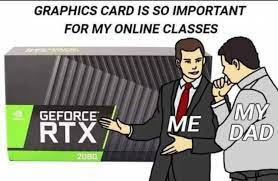

> ### 2.9 Cloud Computing
> <img src="https://www.thebalancesmb.com/thmb/opn3cUYAX4Mib7p9DnnFix0b9jE=/3437x2578/smart/filters:no_upscale()/cloud-computing-502462262-5ac1130e119fa800371ba0a8.jpg" width="350">

In [ ]:
graph(combine(stud,'Q27').head(10),'Cloud Computing(frequently used) - Students')
graph(combine(others,'Q27').head(10),'Cloud Computing(frequently used) - Professionals')

> *Amazon Web services(AWS) is the most preferred among Students as well as Professionals. This is followed by Google Cloud Platform, Microsoft Azure and IBM cloud are also popular.In the simplest terms, cloud computing means storing and accessing data and programs over the internet instead of your computer's hard drive. Thus this helps to check how the model / project works on production*

>*Let's look at the cloud which everyone believes is the most enjoyable and easy to use*

In [ ]:
graph(df_maker(others,'Q28'),'Cloud Computing (most easy to use)')

> *So, AWS clearly tops among most preferred as well as enjoyable to use. Google Cloud is also very much preferred.*

>**🔴Key point- Cloud computing is an important aspect in Data science. the amount of Big Data generated has accelerated tremendously. Storing this data economically and securely is one of the top priorities of organization which is where Cloud comes into picture.  This has given rise to the trend of hiring skilled data analysts,  data engineers and above all data scientists.Apart from various skills which a data scientist must possess like analysis, statistics and programming, he/she is also expected to work on newer platforms in which the organization stores data. More about cloud computing can be found [here](https://www.edureka.co/blog/importance-data-science-cloud-computing/)**

> ### 2.10 Machine Learning (ML) , Computer vision(CV) , Natural Language Processing (NLP) methods and Tools
> <img src="https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fspecials-images.forbesimg.com%2Fdam%2Fimageserve%2F966248982%2F960x0.jpg%3Ffit%3Dscale" width="350">

> > #### 2.10.1 Machine Learning Frameworks and Algorithms comparison

In [ ]:
graph(combine(stud,'Q16').head(10),'Top 10 Machine learning Frameworks - Students')
graph(combine(others,'Q16').head(10),'Top 10 Machine learning Frameworks - Professionals')
graph(combine(stud,'Q17').drop(['None','Other']),'Machine learning algorithms - Students')
graph(combine(others,'Q17').drop(['None','Other']),'Machine learning algorithms - Professionals')

> *The graphs above shows the popularity of frameworks and alogrithms among students vs professionals are almost same with slight variation.* 

> *Graph 1- Most preferred Machine Learning framework among Students is Scikit Learn, followed by Tensor Flow, Keras, Pytorch, XgBoost. LightGBM, CatBoost, PytorchLighting and Hugging Face are followed by them, not higly preferred , yet a good number of students use them too.*

> *Graph 2- Most preferred Machine Learning framework among professionals is also quite similar to Students with Tensor Flow, Keras, Pytorch, XgBoost being the most preferred. Few numbers of Caret lovers are also present among the professionals*

> *Graph 3-  Most preferred by Students ML algorithms are our very old yet most important Linear and Logistic Regression followed by Decision Trees, CNN, Boosting and others as shown.*

> *Graph 4-  Most preferred by professionals ML algorithms are very similar to Students. This graphs can be reffered by any new aspirant to start learning ML algorithms based on a proper comparison of what Students think and what Professionals are using.*

> > #### 2.10.2 Computer Vision Methods Comparison

In [ ]:
temp = combine(stud,'Q18').drop(['None','Other'],axis=0)
temp = temp.rename(index={'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)': 'Image classification and other general purpose networks','Image segmentation methods (U-Net, Mask R-CNN, etc)' : 'Image segmentation methods' , 'Object detection methods (YOLOv3, RetinaNet, etc)' : 'Object detection methods' , 'General purpose image/video tools (PIL, cv2, skimage, etc)' : 'General purpose image/video tools' , 'Generative Networks (GAN, VAE, etc)' : 'Generative Networks'})
graph(temp,'Computer Vision Methods - Students')
temp = combine(others,'Q18').drop(['None','Other'],axis=0)
temp = temp.rename(index={'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)': 'Image classification and other general purpose networks','Image segmentation methods (U-Net, Mask R-CNN, etc)' : 'Image segmentation methods' , 'Object detection methods (YOLOv3, RetinaNet, etc)' : 'Object detection methods' , 'General purpose image/video tools (PIL, cv2, skimage, etc)' : 'General purpose image/video tools' , 'Generative Networks (GAN, VAE, etc)' : 'Generative Networks'})
graph(temp,'Computer Vision Methods - Professionals')

> *The graphs above shows the popularity of Computer vision methods among students vs professionals are same.Both the groups follow the same preference order. An aspiring student who wants to participate in Computer Vision must start with these methods. More information about these topics can be found [here](https://www.analyticsinsight.net/the-5-most-amazing-computer-vision-techniques-to-learn/)* 


> >  #### 2.10.3 Natural Language Processing Methods

In [ ]:
graph(combine(stud,'Q19').drop(['None','Other']),'NLP methods - Students')
graph(combine(others,'Q19').drop(['None','Other']),'NLP methods - Professionals')

> *The graphs above shows the use of NLP methods among students vs professionals are same.Both the groups follow the same preference order. An aspiring student intereseted in NLP must start all these methods equally and gradually. More information about these topics can be found [here.](https://www.analyticsvidhya.com/blog/2021/05/natural-language-processing-step-by-step-guide/)* 


> > #### 2.10.4 Tools(Visualization, Automation and Analysis

In [ ]:
graph(combine(stud,'Q14').drop(['None','Other']),'Data visualization - Students')
graph(combine(others,'Q14').drop(['None','Other']),'Data visualization - Professionals')
graph(combine(stud,'Q34').drop(['None','Other']).head(6),'Top 6 Business Intelligence Tools - Students')
graph(combine(others,'Q34').drop(['None','Other']).head(6),'Top 6 Business Intelligence Tools - Professionals')
graph(combine(stud,'Q37').drop(['None','Other']),'Top AutoML Tools - Students')
graph(combine(others,'Q37').drop(['None','Other']),'Top AutoML Tools - Professionals')
graph(combine(stud,'Q38').drop(['None','Other']).head(6),'Top 6 Tools to manage experiments - Students')
graph(combine(others,'Q38').drop(['No / None','Other','None']).head(6),'Top 6 Tools to manage experiments - Professionals')
graph(df_maker(stud,'Q41').drop(['Other']).head(6),'Top 6 Primary analysis Tools - Students')
graph(df_maker(others,'Q41').drop(['Other']).head(6),'Top 6 Primary analysis Tools - Professionals')

> *All of the above graphs shows almost similar preference and trend between students and professionals. All of these above graphs can be referred when learning about certain tools by looking the trending tools , preferred by both of the groups. These tools make our analysis,visualizations and finally model building and diagnostic and finally management of the experiments very easy.*

# 3. Conclusion

>  **Finally concluding I would say, this notebook will give all Students as well as Professionals to understand the trends in data science currently and help to give an insight on what to improve and include in current learning schedule. I would request all future data scientists to go through it and plan their future. Further, this would help teachers and tutors to plan what should be taught to learners.**